# Equipment data for waste processing

In [32]:
# Import libraries
from swolfpy_inputdata import AnF_Input, RDF_Input, SS_MRF_Input

import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy_financial as npf

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "12"

from IPython.display import Image

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 2)

## SS_MRF

In [44]:
input_data = SS_MRF_Input()
index = ['Calc_base', 'Max_input', 'frac_MaxInput', 'frac_motor', 'motor',
         'diesel_use', 'LPG_use', 'Investment_cost', 'Installation_cost', 'O&M',
         'N_Labor', 'N_Driver', 'LifeTime']
unit = ['0/1/2 (Rmvd/Rmnd/Tot)', 'Mg/hr', 'frac', 'frac', 'kW',
        'L/Mg', 'm3/Mg', '$', '$', '$/yr',
        'person', 'person', 'yr']

equipments_data = pd.DataFrame(index=index)
equipments_data['Unit'] = unit
equipments_data['Drum Feeder'] = pd.DataFrame(input_data.Eq_DFeeder).T['amount']
equipments_data['Rolling Stock'] = pd.DataFrame(input_data.Eq_Rolling_Stock).T['amount']
equipments_data['Air Knife'] = pd.DataFrame(input_data.Eq_AK).T['amount']
equipments_data['Magnet'] = pd.DataFrame(input_data.Eq_Magnet).T['amount']
equipments_data['Magnet_Manual'] = pd.DataFrame(input_data.Eq_Magnet_Manual).T['amount']
equipments_data['Eddy Current Separator'] = pd.DataFrame(input_data.Eq_ECS).T['amount']
equipments_data['Manual Eddy Current Separator'] = pd.DataFrame(input_data.Eq_ECS_Manual).T['amount']
equipments_data['1-Way Baler'] = pd.DataFrame(input_data.Eq_Baler_1Way).T['amount']
equipments_data['2-Way Baler'] = pd.DataFrame(input_data.Eq_Baler_2Way).T['amount']
equipments_data['Conveyor'] = pd.DataFrame(input_data.Eq_Conveyor).T['amount']
equipments_data['Disc Screen 1'] = pd.DataFrame(input_data.Eq_DS1).T['amount']
equipments_data['Disc Screen 1 Manual'] = pd.DataFrame(input_data.Eq_DS1_Manual ).T['amount']
equipments_data['Disc Screen 2'] = pd.DataFrame(input_data.Eq_DS2).T['amount']
equipments_data['Disc Screen 2 Manual'] = pd.DataFrame(input_data.Eq_DS2_Manual ).T['amount']
equipments_data['Disc Screen 3'] = pd.DataFrame(input_data.Eq_DS3).T['amount']
equipments_data['Disc Screen 3 Manual'] = pd.DataFrame(input_data.Eq_DS3_Manual ).T['amount']
equipments_data['Vacuum'] = pd.DataFrame(input_data.Eq_Vac).T['amount']
equipments_data['Vacuum Manual'] = pd.DataFrame(input_data.Eq_Vac_Manual).T['amount']
equipments_data['Optical HDPE'] = pd.DataFrame(input_data.Eq_OHDPE).T['amount']
equipments_data['Manual-OSHDPE'] = pd.DataFrame(input_data.Eq_OSHDPE).T['amount']
equipments_data['Optical PET'] = pd.DataFrame(input_data.Eq_OPET).T['amount']
equipments_data['Optical OSPET'] = pd.DataFrame(input_data.Eq_OSPET).T['amount'] 
equipments_data['Manual Sort 1 (Negative)'] = pd.DataFrame(input_data.Eq_MS1).T['amount']
equipments_data['Manual Sort 2-DS2 (Negative)'] = pd.DataFrame(input_data.Eq_MS2_DS2).T['amount']
equipments_data['Manual Sort 2-DS3 (Negative)'] = pd.DataFrame(input_data.Eq_MS2_DS3).T['amount']
equipments_data['Glass Breaker Screen'] = pd.DataFrame(input_data.Eq_GBS).T['amount']
equipments_data['Optical Glass'] = pd.DataFrame(input_data.Eq_OG).T['amount']   
equipments_data['Manual Sort 3-G (Negative)'] = pd.DataFrame(input_data.Eq_MS3_G).T['amount']
equipments_data['Manual Sort 4-PET (Negative)'] = pd.DataFrame(input_data.Eq_MS4_PET).T['amount']
equipments_data['Manual Sort 4-HDPE (Negative)'] = pd.DataFrame(input_data.Eq_MS4_HDPE).T['amount']
equipments_data['Manual Sort 4-Fe  (Negative)'] = pd.DataFrame(input_data.Eq_MS4_Fe).T['amount']
equipments_data['Manual Sort 4-Al  (Negative)'] = pd.DataFrame(input_data.Eq_MS4_Al).T['amount']
equipments_data['Manual Sort 5 (Positive)'] = pd.DataFrame(input_data.Eq_MS5).T['amount']
  
for i in ['Drum Feeder', 'Rolling Stock', 'Air Knife', 'Magnet',
          'Magnet_Manual', 'Eddy Current Separator',
          'Manual Eddy Current Separator', '1-Way Baler', '2-Way Baler',
          'Conveyor', 'Disc Screen 1', 'Disc Screen 1 Manual', 'Disc Screen 2',
          'Disc Screen 2 Manual', 'Disc Screen 3', 'Disc Screen 3 Manual',
          'Vacuum', 'Vacuum Manual', 'Optical HDPE', 'Manual-OSHDPE',
          'Optical PET', 'Optical OSPET', 'Manual Sort 1 (Negative)',
          'Manual Sort 2-DS2 (Negative)', 'Manual Sort 2-DS3 (Negative)',
          'Glass Breaker Screen', 'Optical Glass', 'Manual Sort 3-G (Negative)',
          'Manual Sort 4-PET (Negative)', 'Manual Sort 4-HDPE (Negative)',
          'Manual Sort 4-Fe  (Negative)', 'Manual Sort 4-Al  (Negative)',
          'Manual Sort 5 (Positive)']:
    total_throughput = equipments_data.loc['Max_input', i] * equipments_data.loc['frac_MaxInput', i]
    equipments_data.loc['Elec', i] =  round(
        (equipments_data.loc['motor', i] * equipments_data.loc['frac_motor', i])
        / total_throughput, 2)

    LaborReq = equipments_data.loc['N_Labor', i] / total_throughput
    DriverReq = equipments_data.loc['N_Driver', i] / total_throughput
    LaborCost = (
        (LaborReq * input_data.Labor['Labor_rate']['amount']
         + DriverReq * input_data.Labor['Driver_rate']['amount'])
        * (1 + input_data.Labor['Fringe_rate']['amount'])
        * (1 + input_data.Labor['Management_rate']['amount']))
    equipments_data.loc['Labor Cost', i] = round(LaborCost, 2)

    Cap = equipments_data.loc['Investment_cost', i] + equipments_data.loc['Installation_cost', i]
    Rate = input_data.Constr_cost['Inerest_rate']['amount']
    Lftime = equipments_data.loc['LifeTime', i]
    TotalHour = (
        input_data.Labor['Hr_shift']['amount']
        * input_data.Labor['Shift_day']['amount']
        * input_data.Labor['Day_year']['amount'])
    # Average Cost of Ownership ($/Mg)
    AveCostOwner = (
        (npf.pmt(Rate, Lftime, -Cap) + equipments_data.loc['O&M', i])
        / (TotalHour * equipments_data.loc['Max_input', i] * equipments_data.loc['frac_MaxInput', i]))
    equipments_data.loc['Ave Cost Owner', i] = round(AveCostOwner, 2)

equipments_data.loc['Elec', 'Unit'] = 'kWh/Mg'
equipments_data.loc['Labor Cost', 'Unit'] = '$/Mg'
equipments_data.loc['Ave Cost Owner', 'Unit'] = '$/Mg'

SSMRF_eq = equipments_data
SSMRF_eq

,Unit,Drum Feeder,Rolling Stock,Air Knife,Magnet,Magnet_Manual,Eddy Current Separator,Manual Eddy Current Separator,1-Way Baler,2-Way Baler,...,Manual Sort 2-DS2 (Negative),Manual Sort 2-DS3 (Negative),Glass Breaker Screen,Optical Glass,Manual Sort 3-G (Negative),Manual Sort 4-PET (Negative),Manual Sort 4-HDPE (Negative),Manual Sort 4-Fe (Negative),Manual Sort 4-Al (Negative),Manual Sort 5 (Positive)
Calc_base,0/1/2 (Rmvd/Rmnd/Tot),2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,...,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Max_input,Mg/hr,30.0,24.0,36.0,2.0,2.0,12.0,2.0,51.0,30.0,...,30.0,30.0,9.0,5.0,30.0,30.0,30.0,30.0,30.0,30.0
frac_MaxInput,frac,1.0,0.85,0.85,0.85,0.85,0.85,0.85,1.0,1.0,...,0.85,0.85,0.85,0.95,0.85,0.85,0.85,0.85,0.85,0.85
frac_motor,frac,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
motor,kW,15.0,0.0,164.2,4.0,3.0,9.0,3.0,63.0,59.0,...,3.0,3.0,30.0,69.0,3.0,3.0,3.0,3.0,3.0,3.0
diesel_use,L/Mg,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LPG_use,m3/Mg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Investment_cost,$,150000.0,350000.0,62500.0,35000.0,50000.0,128000.0,50000.0,550000.0,530000.0,...,50000.0,50000.0,220000.0,825000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
Installation_cost,$,15000.0,35000.0,6250.0,3500.0,5000.0,12800.0,5000.0,55000.0,53000.0,...,5000.0,5000.0,22000.0,82500.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
O&M,$/yr,100.0,5000.0,10000.0,5000.0,0.0,5000.0,0.0,5000.0,5000.0,...,0.0,0.0,10000.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0


## RDF

In [22]:
input_data = RDF_Input()
index = ['Calc_base', 'Max_input', 'frac_MaxInput', 'frac_motor', 'motor',
         'diesel_use', 'LPG_use', 'Investment_cost', 'Installation_cost', 'O&M',
         'N_Labor', 'N_Driver', 'LifeTime']
unit = ['0/1/2 (Rmvd/Rmnd/Tot)', 'Mg/hr', 'frac', 'frac', 'kW',
        'L/Mg', 'm3/Mg', '$', '$', '$/yr',
        'person', 'person', 'yr']

equipments_data = pd.DataFrame(index=index)
equipments_data['Unit'] = unit
equipments_data['Flail Mill'] = pd.DataFrame(input_data.Eq_FMill).T['amount']
equipments_data['Rolling Stock'] = pd.DataFrame(input_data.Eq_Rolling_Stock).T['amount']
equipments_data['Trommel'] = pd.DataFrame(input_data.Eq_Trommel).T['amount']
equipments_data['Negative Sort'] = pd.DataFrame(input_data.Eq_Neg_Sort).T['amount']
equipments_data['Positive Sort'] = pd.DataFrame(input_data.Eq_Pos_Sort).T['amount']
equipments_data['Air Separator'] = pd.DataFrame(input_data.Eq_Air_Sep).T['amount']
equipments_data['Magnet'] = pd.DataFrame(input_data.Eq_Magnet).T['amount']
equipments_data['Eddy Current Separator'] = pd.DataFrame(input_data.Eq_ECS).T['amount']
equipments_data['Optical Sorter'] = pd.DataFrame(input_data.Eq_Opt_Sort).T['amount']
equipments_data['Shredder'] = pd.DataFrame(input_data.Eq_Shred).T['amount']
equipments_data['Pelletizer'] = pd.DataFrame(input_data.Eq_Pellet).T['amount']
equipments_data['Baler'] = pd.DataFrame(input_data.Eq_Baler).T['amount']
equipments_data['Densimetric table'] = pd.DataFrame(input_data.Eq_DMT).T['amount']
equipments_data['Conveyor'] = pd.DataFrame(input_data.Eq_Conveyor).T['amount']

for i in ['Flail Mill', 'Rolling Stock', 'Trommel', 'Negative Sort',
          'Positive Sort', 'Air Separator', 'Magnet', 'Eddy Current Separator',
          'Optical Sorter', 'Shredder', 'Pelletizer', 'Baler',
          'Densimetric table', 'Conveyor']:
    total_throughput = equipments_data.loc['Max_input', i] * equipments_data.loc['frac_MaxInput', i]
    equipments_data.loc['Elec', i] =  round(
        (equipments_data.loc['motor', i] * equipments_data.loc['frac_motor', i])
        / total_throughput, 2)
    

    
    LaborReq = equipments_data.loc['N_Labor', i] / total_throughput
    DriverReq = equipments_data.loc['N_Driver', i] / total_throughput
    LaborCost = (
        (LaborReq * input_data.Labor['Labor_rate']['amount']
         + DriverReq * input_data.Labor['Driver_rate']['amount'])
        * (1 + input_data.Labor['Fringe_rate']['amount'])
        * (1 + input_data.Labor['Management_rate']['amount']))
    equipments_data.loc['Labor Cost', i] = round(LaborCost, 2)

    Cap = equipments_data.loc['Investment_cost', i] + equipments_data.loc['Installation_cost', i]
    Rate = input_data.Constr_cost['Inerest_rate']['amount']
    Lftime = equipments_data.loc['LifeTime', i]
    TotalHour = (
        input_data.Labor['Hr_shift']['amount']
        * input_data.Labor['Shift_day']['amount']
        * input_data.Labor['Day_year']['amount'])
    # Average Cost of Ownership ($/Mg)
    AveCostOwner = (
        (npf.pmt(Rate, Lftime, -Cap) + equipments_data.loc['O&M', i])
        / (TotalHour * equipments_data.loc['Max_input', i] * equipments_data.loc['frac_MaxInput', i]))
    equipments_data.loc['Ave Cost Owner', i] = round(AveCostOwner, 2)

equipments_data.loc['Elec', 'Unit'] = 'kWh/Mg'
equipments_data.loc['Labor Cost', 'Unit'] = '$/Mg'
equipments_data.loc['Ave Cost Owner', 'Unit'] = '$/Mg'

RDF_eq = equipments_data
RDF_eq

,Unit,Flail Mill,Rolling Stock,Trommel,Negative Sort,Positive Sort,Air Separator,Magnet,Eddy Current Separator,Optical Sorter,Shredder,Pelletizer,Baler,Densimetric table,Conveyor
Calc_base,0/1/2 (Rmvd/Rmnd/Tot),2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
Max_input,Mg/hr,45.0,24.0,45.0,2.0,2.0,36.0,2.0,12.0,7.0,27.0,20.0,30.0,2.5,30.0
frac_MaxInput,frac,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,1.0,0.85,0.85
frac_motor,frac,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
motor,kW,304.0,0.0,61.6,3.0,3.0,164.2,4.0,9.0,56.1,809.0,895.0,59.0,12.6,5.6
diesel_use,L/Mg,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LPG_use,m3/Mg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Investment_cost,$,350000.0,350000.0,125000.0,50000.0,50000.0,35000.0,35000.0,128000.0,825000.0,35000.0,500000.0,530000.0,125000.0,46258.0
Installation_cost,$,35000.0,0.0,12500.0,5000.0,5000.0,3500.0,3500.0,12800.0,82500.0,3500.0,50000.0,53000.0,12500.0,4625.8
O&M,$/yr,10000.0,5000.0,10000.0,0.0,0.0,5000.0,5000.0,5000.0,3000.0,5000.0,25000.0,5000.0,10000.0,10000.0


## AnF

In [23]:
input_data = AnF_Input()
index = ['Calc_base', 'Max_input', 'frac_MaxInput', 'frac_motor', 'motor',
         'diesel_use', 'LPG_use', 'Investment_cost', 'Installation_cost', 'O&M',
         'N_Labor', 'N_Driver', 'LifeTime']
unit = ['0/1/2 (Rmvd/Rmnd/Tot)', 'Mg/hr', 'frac', 'frac', 'kW',
        'L/Mg', 'm3/Mg', '$', '$', '$/yr',
        'person', 'person', 'yr']
equipments_data = pd.DataFrame(index=index)
equipments_data['Unit'] = unit
equipments_data['Drum Feeder'] = pd.DataFrame(input_data.Eq_DFeeder).T['amount']
equipments_data['Disc Screen'] = pd.DataFrame(input_data.Eq_DS).T['amount']
equipments_data['Negative Sort'] = pd.DataFrame(input_data.Eq_Neg_Sort).T['amount']
equipments_data['Shredder'] = pd.DataFrame(input_data.Eq_Shred).T['amount']
equipments_data['Sterilizer'] = pd.DataFrame(input_data.Eq_Sterilizer).T['amount']
equipments_data['Dewater'] = pd.DataFrame(input_data.Eq_Dewater).T['amount']
equipments_data['Dryer'] = pd.DataFrame(input_data.Eq_Dryer).T['amount']
equipments_data['Pelletizer'] = pd.DataFrame(input_data.Eq_Pellet).T['amount']
equipments_data['Conveyor'] = pd.DataFrame(input_data.Eq_Conveyor).T['amount']

for i in ['Drum Feeder', 'Disc Screen', 'Negative Sort', 'Shredder',
          'Sterilizer', 'Dewater', 'Dryer', 'Pelletizer', 'Conveyor']:
    total_throughput = equipments_data.loc['Max_input', i] * equipments_data.loc['frac_MaxInput', i]
    equipments_data.loc['Elec', i] =  round(
        (equipments_data.loc['motor', i] * equipments_data.loc['frac_motor', i])
        / total_throughput, 2)
    

    
    LaborReq = equipments_data.loc['N_Labor', i] / total_throughput
    DriverReq = equipments_data.loc['N_Driver', i] / total_throughput
    LaborCost = (
        (LaborReq * input_data.Labor['Labor_rate']['amount']
         + DriverReq * input_data.Labor['Driver_rate']['amount'])
        * (1 + input_data.Labor['Fringe_rate']['amount'])
        * (1 + input_data.Labor['Management_rate']['amount']))
    equipments_data.loc['Labor Cost', i] = round(LaborCost, 2)

    Cap = equipments_data.loc['Investment_cost', i] + equipments_data.loc['Installation_cost', i]
    Rate = input_data.Constr_cost['Inerest_rate']['amount']
    Lftime = equipments_data.loc['LifeTime', i]
    TotalHour = (
        input_data.Labor['Hr_shift']['amount']
        * input_data.Labor['Shift_day']['amount']
        * input_data.Labor['Day_year']['amount'])
    # Average Cost of Ownership ($/Mg)
    AveCostOwner = (
        (npf.pmt(Rate, Lftime, -Cap) + equipments_data.loc['O&M', i])
        / (TotalHour * equipments_data.loc['Max_input', i] * equipments_data.loc['frac_MaxInput', i]))
    equipments_data.loc['Ave Cost Owner', i] = round(AveCostOwner, 2)

equipments_data.loc['Elec', 'Unit'] = 'kWh/Mg'
equipments_data.loc['Labor Cost', 'Unit'] = '$/Mg'
equipments_data.loc['Ave Cost Owner', 'Unit'] = '$/Mg'

    
AnF_eq = equipments_data
AnF_eq

,Unit,Drum Feeder,Disc Screen,Negative Sort,Shredder,Sterilizer,Dewater,Dryer,Pelletizer,Conveyor
Calc_base,0/1/2 (Rmvd/Rmnd/Tot),2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Max_input,Mg/hr,30.0,45.0,30.0,30.0,10.0,25.0,12.0,8.0,30.0
frac_MaxInput,frac,1.0,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85
frac_motor,frac,0.5,0.5,0.5,0.85,0.85,0.85,0.85,0.85,0.5
motor,kW,15.0,8.5,3.0,320.0,4.0,7.0,100.0,60.0,5.6
diesel_use,L/Mg,0.0,0.0,0.0,0.0,4.5,0.0,24.0,0.0,0.0
LPG_use,m3/Mg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Investment_cost,$,150000.0,175000.0,50000.0,150000.0,60000.0,40000.0,350000.0,30000.0,46258.0
Installation_cost,$,15000.0,17500.0,5000.0,15000.0,6000.0,4000.0,35000.0,2500.0,4625.8
O&M,$/yr,100.0,10000.0,0.0,5000.0,5000.0,5000.0,10000.0,5000.0,10000.0


## Comparison

In [57]:
Selected_cols = ['Investment_cost', 'Installation_cost', 'O&M']
res = pd.concat([SSMRF_eq.iloc[:, 1:].T[Selected_cols],
                 RDF_eq.iloc[:, 1:].T[Selected_cols],
                 AnF_eq.iloc[:, 1:].T[Selected_cols]], axis=1)
columns = []
for x in ['SSMRF', 'RDF', 'AnF']:
    for y in Selected_cols:
        columns.append((x, y))
res.columns = pd.MultiIndex.from_tuples(columns)
res

SSMRF                             \
                              Investment_cost Installation_cost      O&M   
Drum Feeder                    150000.0        15000.0           100.0     
Rolling Stock                  350000.0        35000.0           5000.0    
Air Knife                      62500.0         6250.0            10000.0   
Magnet                         35000.0         3500.0            5000.0    
Magnet_Manual                  50000.0         5000.0            0.0       
Eddy Current Separator         128000.0        12800.0           5000.0    
Manual Eddy Current Separator  50000.0         5000.0            0.0       
1-Way Baler                    550000.0        55000.0           5000.0    
2-Way Baler                    530000.0        53000.0           5000.0    
Conveyor                       46258.0         4625.8            10000.0   
Disc Screen 1                  175000.0        17500.0           10000.0   
Disc Screen 1 Manual           50000.0         5000.0            0.0       
Disc Screen 2                  400000.0        40000.0           13000.0   
Disc Screen 2 Manual           50000.0         5000.0            0.0       
Disc Screen 3                  280000.0        28000.0           10000.0   
Disc Screen 3 Manual           50000.0         5000.0            0.0       
Vacuum                         150000.0        15000.0           100.0     
Vacuum Manual                  50000.0         5000.0            0.0       
Optical HDPE                   450000.0        45000.0           10000.0   
Manual-OSHDPE                  50000.0         5000.0            0.0       
Optical PET                    225000.0        22500.0           5000.0    
Optical OSPET                  50000.0         5000.0            0.0       
Manual Sort 1 (Negative)       50000.0         5000.0            0.0       
Manual Sort 2-DS2 (Negative)   50000.0         5000.0            0.0       
Manual Sort 2-DS3 (Negative)   50000.0         5000.0            0.0       
Glass Breaker Screen           220000.0        22000.0           10000.0   
Optical Glass                  825000.0        82500.0           30000.0   
Manual Sort 3-G (Negative)     50000.0         5000.0            0.0       
Manual Sort 4-PET (Negative)   50000.0         5000.0            0.0       
Manual Sort 4-HDPE (Negative)  50000.0         5000.0            0.0       
Manual Sort 4-Fe  (Negative)   50000.0         5000.0            0.0       
Manual Sort 4-Al  (Negative)   50000.0         5000.0            0.0       
Manual Sort 5 (Positive)       50000.0         5000.0            0.0       
Disc Screen                    NaN             NaN               NaN       
Negative Sort                  NaN             NaN               NaN       
Shredder                       NaN             NaN               NaN       
Sterilizer                     NaN             NaN               NaN       
Dewater                        NaN             NaN               NaN       
Dryer                          NaN             NaN               NaN       
Pelletizer                     NaN             NaN               NaN       

                                          RDF                             \
                              Investment_cost Installation_cost      O&M   
Drum Feeder                    150000.0        15000.0           100.0     
Rolling Stock                  350000.0        35000.0           5000.0    
Air Knife                      62500.0         6250.0            10000.0   
Magnet                         35000.0         3500.0            5000.0    
Magnet_Manual                  50000.0         5000.0            0.0       
Eddy Current Separator         128000.0        12800.0           5000.0    
Manual Eddy Current Separator  50000.0         5000.0            0.0       
1-Way Baler                    550000.0        55000.0           5000.0    
2-Way Baler                    530000.0        53000.0           5000.0    
Conveyor   

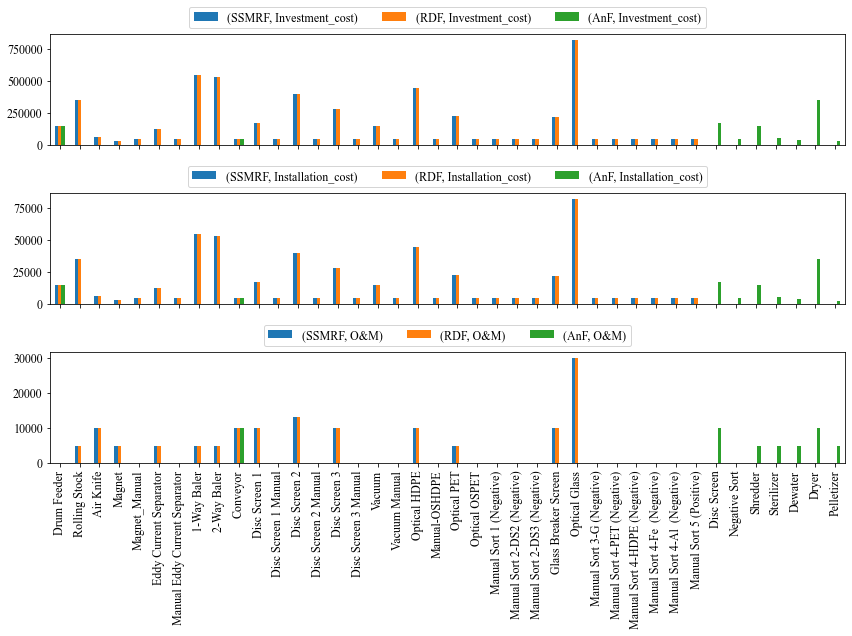

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
res.iloc[:, np.arange(0, res.shape[1], 3)].plot.bar(ax=ax1)
res.iloc[:, np.arange(1, res.shape[1], 3)].plot.bar(ax=ax2)
res.iloc[:, np.arange(2, res.shape[1], 3)].plot.bar(ax=ax3)
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5)
ax3.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5)
fig.tight_layout()

In [98]:
Selected_cols = ['N_Labor', 'N_Driver']
res = pd.concat([SSMRF_eq.iloc[:, 1:].T[Selected_cols],
                 RDF_eq.iloc[:, 1:].T[Selected_cols],
                 AnF_eq.iloc[:, 1:].T[Selected_cols]], axis=1)
columns = []
for x in ['SSMRF', 'RDF', 'AnF']:
    for y in Selected_cols:
        columns.append((x, y))
res.columns = pd.MultiIndex.from_tuples(columns)
res

SSMRF              RDF              AnF  \
                              N_Labor N_Driver N_Labor N_Driver N_Labor   
Drum Feeder                    0.0     0.0      0.0     0.0      1.0      
Rolling Stock                  0.0     1.0      0.0     1.0      NaN      
Air Knife                      0.0     0.0      0.0     0.0      NaN      
Magnet                         0.0     0.0      0.0     0.0      NaN      
Magnet_Manual                  76.5    0.0      76.5    0.0      NaN      
Eddy Current Separator         0.0     0.0      0.0     0.0      NaN      
Manual Eddy Current Separator  3.4     0.0      3.4     0.0      NaN      
1-Way Baler                    1.0     0.0      1.0     0.0      NaN      
2-Way Baler                    1.0     0.0      1.0     0.0      NaN      
Conveyor                       0.0     0.0      0.0     0.0      0.0      
Disc Screen 1                  0.0     0.0      0.0     0.0      NaN      
Disc Screen 1 Manual           35.7    0.0      35.7    0.0      NaN      
Disc Screen 2                  0.0     0.0      0.0     0.0      NaN      
Disc Screen 2 Manual           3.4     0.0      3.4     0.0      NaN      
Disc Screen 3                  0.0     0.0      0.0     0.0      NaN      
Disc Screen 3 Manual           17.0    0.0      17.0    0.0      NaN      
Vacuum                         2.0     0.0      2.0     0.0      NaN      
Vacuum Manual                  17.0    0.0      17.0    0.0      NaN      
Optical HDPE                   0.0     0.0      0.0     0.0      NaN      
Manual-OSHDPE                  17.0    0.0      17.0    0.0      NaN      
Optical PET                    0.0     0.0      0.0     0.0      NaN      
Optical OSPET                  51.0    0.0      51.0    0.0      NaN      
Manual Sort 1 (Negative)       0.0     0.0      0.0     0.0      NaN      
Manual Sort 2-DS2 (Negative)   6.0     0.0      6.0     0.0      NaN      
Manual Sort 2-DS3 (Negative)   2.0     0.0      2.0     0.0      NaN      
Glass Breaker Screen           0.0     0.0      0.0     0.0      NaN      
Optical Glass                  0.0     0.0      0.0     0.0      NaN      
Manual Sort 3-G (Negative)     3.0     0.0      3.0     0.0      NaN      
Manual Sort 4-PET (Negative)   1.0     0.0      1.0     0.0      NaN      
Manual Sort 4-HDPE (Negative)  1.0     0.0      1.0     0.0      NaN      
Manual Sort 4-Fe  (Negative)   0.0     0.0      0.0     0.0      NaN      
Manual Sort 4-Al  (Negative)   1.0     0.0      1.0     0.0      NaN      
Manual Sort 5 (Positive)       0.0     0.0      0.0     0.0      NaN      
Disc Screen                    NaN     NaN      NaN     NaN      1.0      
Negative Sort                  NaN     NaN      NaN     NaN      6.0      
Shredder                       NaN     NaN      NaN     NaN      1.0      
Sterilizer                     NaN     NaN      NaN     NaN      0.0      
Dewater                        NaN     NaN      NaN     NaN      0.0      
Dryer                          NaN     NaN      NaN     NaN      0.0      
Pelletizer                     NaN     NaN      NaN     NaN      0.0      

                                        
                              N_Driver  
Drum Feeder                    1.0      
Rolling Stock                  NaN      
Air Knife                      NaN      
Magnet                         NaN      
Magnet_Manual                  NaN      
Eddy Current Separator         NaN      
Manual Eddy Current Separator  NaN      
1-Way Baler                    NaN      
2-Way Baler                    NaN      
Conveyor                       0.0      
Disc Screen 1                  NaN      
Disc Screen 1 Manual           NaN      
Disc Screen 2                  NaN      
Disc Screen 2 Manual           NaN      
Disc Screen 3                  NaN      
Disc Screen 3 Manual           NaN      
Vacuum                         NaN      
Vacuum Manual                  NaN      
Optical HDPE                   NaN      
Manual-OSHDPE       

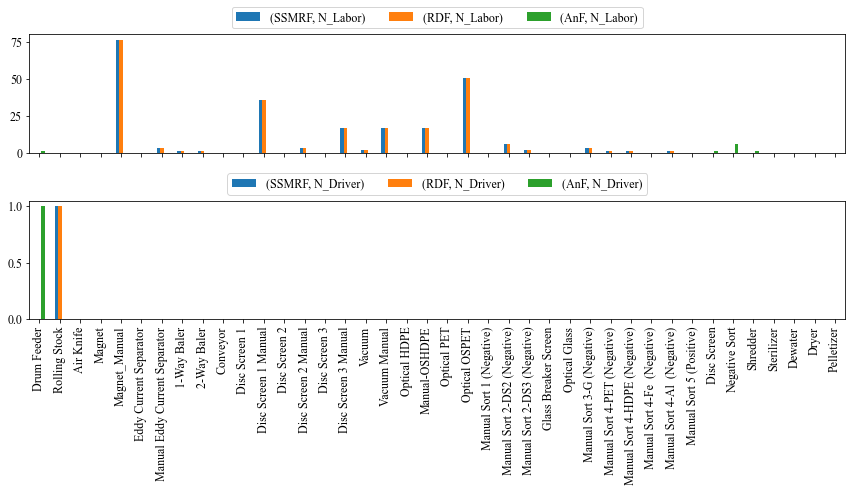

In [100]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7), sharex=True)
res.iloc[:, np.arange(0, res.shape[1], 2)].plot.bar(ax=ax1)
res.iloc[:, np.arange(1, res.shape[1], 2)].plot.bar(ax=ax2)
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5)
fig.tight_layout()